# Cure Kinetics (28 points)

### As it was explained during the lectures, a significant part of research in composites manufacturing is involved in analyzing curing processes of thermoset polymers.Thermoset resins, such as epoxy, undergo a curing process driven by chemical reactions. These reactions result in the creation of covalent bonds among monomers, ultimately forming polymer chains. This curing process is quantified by the parameter known as the 'degree of cure,' denoted as $\alpha$. Initially, in the absence of any covalent bonds, the material consists solely of individual monomers. In this scenario, it can be asserted that no bonding has occurred, resulting in $\alpha = 0$. However, upon the addition of a hardener, the monomers initiate the formation of polymer chains through the establishment of covalent bonds. When all the monomers have become part of polymer chains through these covalent bonds, it is deemed that the degree of cure has reached its maximum, $\alpha = 1$

### Chemical reactions occur through contact of two active groups belonging to different molecules (for example of epoxy and of a hardener). Elevated cure temperatures are essential to trigger and maintain the chemical reactions responsible for converting the thermoset into a fully cured state. Whenever resin and hardener molecules (after mixing) are provided with more kinetic energy, they are more likely to shift and collide with neighbouring molecules, increasing the chances of curing reactions. Additionally, when more time is given to two reactants, the probability of a necessary collision for bonding increases. As a result, these phenomena are highly influenced by resin chemistry, catalyst reactivity, cure temperature, and the presence of inhibitors or accelerators.

### Therefore, we can say that the degree of cure $\alpha$ is a function of both temperature and time. $$\alpha = f(T,t)$$

#### Cure kinetics is concerned with the rates of the chemical reactions in a curing process. This is relevant, since the cure kinetics can help predict the thermoset cure and therefore also determines the manufacturing process and (partially) the final material properties. When cure kinetics are understood, they can be used to predict the degree of cure $\alpha$ of a certain process. To make this type of prediction, DSC measurement data can be used.

#### Before starting to work on the questions and to achieve a better understanding of the topic, it is highly recommended for you to read the paper provided with this notebook (Kailong Jin, William H. Heath, John M. Torkelson, Kinetics of multifunctional thiol-epoxy click reactions studied by differential scanning calorimetry: Effects of catalysis and functionality. Polymer. 2015; 81: 70-78).

### Question 1 (1 point)
#### Differential Scanning Calorimetry (DSC) experiments are frequently used to evaluate the cure kinetics parameters involved in the curing of thermosets. To show this correlation, three tests were performed in isothermal conditions for the polymerization of a thermoset at three different temperatures. The .txt files which contain these raw isothermal DSC measurements were attached to this notebook.
#### In the cell below, plot the relevant DSC measurement data for all of the three cases in a single figure. Don't forget to label the axis (ylabel = H[W/g], xlabel=t[min]).
#### NOTE: The unit used for heat flow data in the .txt files is [mW/s]

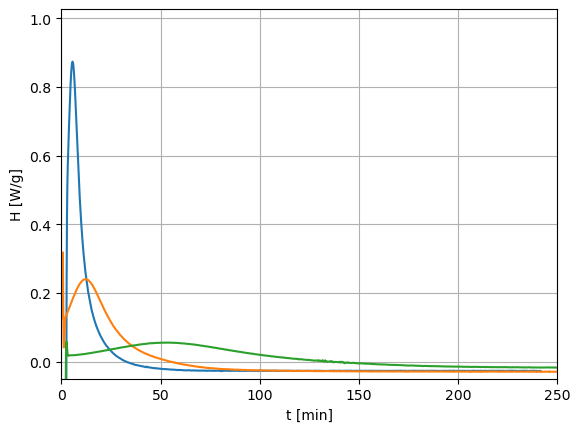

In [6]:
#import packages here
import numpy as np
from matplotlib import pyplot as plt
array1, array2, array3 = [], [], []

with open('lme_0_11_copy.txt', 'r') as f:
    for line in f.readlines():
        l = line.strip().split('\t')
        array1.append(l)

with open('lme_0_12b_copy.txt', 'r') as f:
    for line in f.readlines():
        l = line.strip().split('\t')
        array2.append(l)

with open('lme_0_13_copy.txt', 'r') as f:
    for line in f.readlines():
        l = line.strip().split('\t')
        array3.append(l)

sample_mass = [0, 14.4, 10.4, 13.7]
for l in [array1, array2, array3]:
    for k in l:
        old = l.index(k)
        for i in k:
            new = l[old].index(i)
            if i.count('.') == 2:
                found = False
                j=0
                while not found:
                    if i[j-1] == '.':
                        l[old][new] = i[:j-1] + i[(j):]
                        found = True
                    j-=1
            l[old][new] = float(l[old][new])

time1 = np.array(array1)[:,0]
time_delta1 = []
for i in range(len(time1)):
    time_delta1.append(time1[i]-time1[i-1])

time2 = np.array(array2)[:,0]
time_delta2 = []
for i in range(len(time2)):
    time_delta2.append(time2[i]-time2[i-1])

time3 = np.array(array3)[:,0]
time_delta3 = []
for i in range(len(time3)):
    time_delta3.append(time3[i]-time3[i-1])

time_delta = 0.0166666666666667

heat1 = (np.array(array1)[:,1])/sample_mass[1]*time_delta*60
heat2 = (np.array(array2)[:,1])/sample_mass[2]*time_delta*60
heat3 = (np.array(array3)[:,1])/sample_mass[3]*time_delta*60

plt.plot(time1[1:], heat1[1:])
plt.plot(time2[1:], heat2[1:])
plt.plot(time3[1:], heat3[1:])

plt.ylim(-.05)
plt.xlim(0,250)
plt.xlabel('t [min]')
plt.ylabel('H [W/g]')
plt.grid()
plt.show()

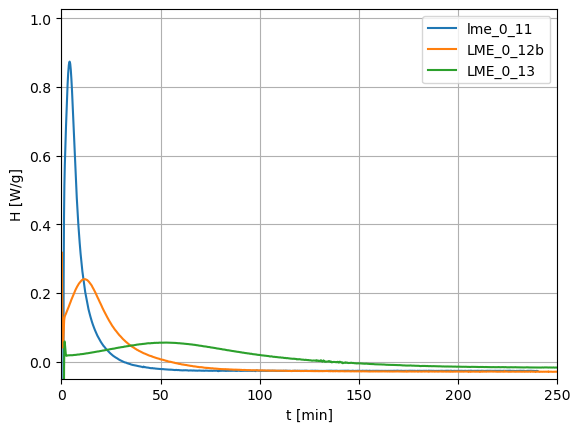

In [5]:
import numpy as np
from matplotlib import pyplot as plt

data = np.genfromtxt('Graph_CureKinetics.csv', delimiter=',', dtype=float)        
    
plt.plot(data[:,0], data[:,1], label='lme_0_11')
plt.plot(data[:,2], data[:,3], label='LME_0_12b')
plt.plot(data[:,4], data[:,5], label='LME_0_13')

plt.xlabel('t [min]')
plt.ylabel('H [W/g]')
plt.ylim(-.05)
plt.xlim(0,250)
plt.legend()
plt.grid()
plt.show()

### Question 2 (2 points)
#### After visualizing the heat generation curves, explain why and how isothermal DSC measurement data can be related to the curing rate of a thermoset resin. Why is there a peak and what can it be related to?

Answer:

#### As mentioned, the just plotted isothermal DSC data  can be used to obtain an estimation of degree of cure $\alpha$ vs. time $t$. To do so, it first has to be assumed that the heat flow is proportional to the degree of cure.  $$\Delta H_{max} \equiv \alpha = 1$$
#### Where  $\Delta H_{max} $ identifies the maximum total heat of reaction found for the three DSC measurements.
#### Overall, the formula above expresses how the total generated heat flow while curing corresponds to a complete degree of cure for the reaction (100%).
#### Then, this assumption is used to normalize the heat flow measurement. This normalized heat flow can now be related to the curing rate. $$\frac{d\alpha}{dt} = \frac{1}{\Delta H{max}} \frac{dH(t)}{dt}$$
#### Finally, integrating this result leads to the relationship of the degree of cure $\alpha$ vs. time $t$.

### Question 3 (4 points)
#### Use the assumptions and information provided above to plot the degree of cure $\alpha$ vs. time $t$, using the provided data. Plot all cases in a single figure. Make sure to plot over a time interval which suits the results, include a legend and axes labels with units.

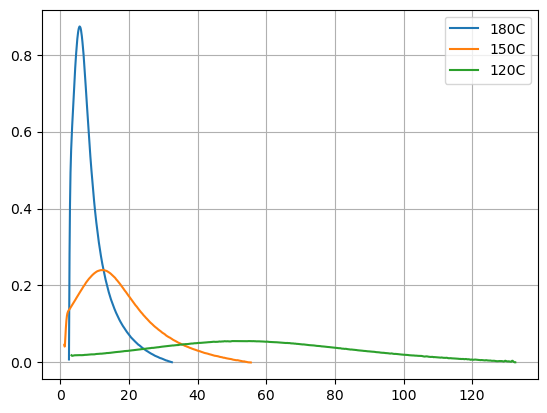

[7.21395833e-03 4.06945139e-02 7.24733333e-02 ... 1.96180556e-04
 8.82638889e-05 5.39583333e-05]
7.1455571278103625 5.604913709375156 4.066523373972162


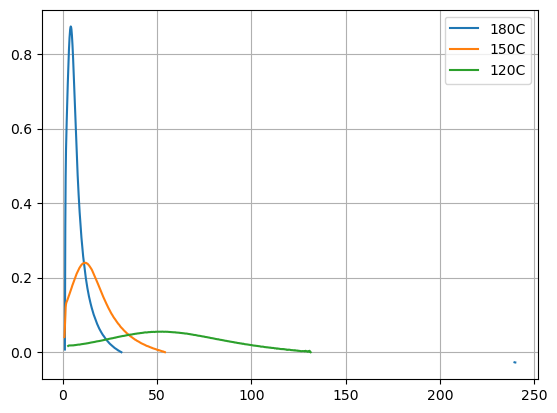

-0.027483327
7.145841771849657 5.602509783347601 4.0598940369838905


In [7]:
start1, start2, start3 = 60, 40, 140
end1, end2, end3 = 1860, 3300, 7900

plt.plot(time1[start1:end1], heat1[start1:end1], label='180C')
plt.plot(time2[start2:end2], heat2[start2:end2], label='150C')
plt.plot(time3[start3:end3], heat3[start3:end3], label='120C')
plt.legend()
plt.grid()
plt.show()

print(heat1[start1:end1])

area1 = np.trapz(heat1[start1:end1], time1[start1:end1])
area2 = np.trapz(heat2[start2:end2], time2[start2:end2])
area3 = np.trapz(heat3[start3:end3], time3[start3:end3])
print(area1, area2, area3)


data = np.genfromtxt('Graph_CureKinetics_v2.csv', delimiter=',', dtype=float)


time4 = [float(value) for value in data[:,0]]
time5 = [float(value) for value in data[:,2]]
time6 = [float(value) for value in data[:,4]]
heat4 = [float(value) for value in data[:,1]]
heat5 = [float(value) for value in data[:,3]]
heat6 = [float(value) for value in data[:,5]]

plt.plot(time4, heat4, label='180C')
plt.plot(time5, heat5, label='150C')
plt.plot(time6, heat6, label='120C')
plt.legend()
plt.grid()
plt.show()

print(heat4[-1])
end = -1
area4 = np.trapz(heat4[:1799], time4[:1799])
area5 = np.trapz(heat5[:3201], time5[:3201])
area6 = np.trapz(heat6[:7721], time6[:7721])
print(area4, area5, area6)

### Question 4 (4 points)

#### Question 4.1: In the previous question you have generated graphs illustrating the relationship between the degree of cure $\alpha$ and time t for three isothermal DSC measurements carried out at different temperatures. Provide your analysis regarding the maximum degree of cure visible in the generated graphs. Can you explain the correlation between the final degree of cure and cure temperature? 

Answer:

#### Question 4.2 : A graph correlating degree of cure $\alpha$, sometimes also called conversion, and cure time for DSC isothermal scans of an epoxy-amine system is reported below. Conversions of the system cured at six different temperatures for 166 hours are shown.
#### Use this data to compare your graph from question 3 and the given one. You may highlight similarities and provide your reasons for any possible relevant difference.

Conversion vs. ln(time) curves for an epoxy-amine system. From Wisanrakkit and Gillham, J. Appl. Poly. Sci. 42, 2453 (1991)
<img src="Conversion-time-plot.jpg" width="700" height="400">

Answer:

#### Several cure kinetics models were formulated to predict and simulate experimental cure profiles of thermosetting resins in terms of curing rate. You will be putting to test one of the most widely used ones: the Kamal-Sourour model (shown below) $$\frac{d\alpha}{dt} = (k_1 + k_2 \cdot \alpha^m)(1 - \alpha)^n$$
#### Where $k_1$ and $k_2$ are rate constants, and  $m$ and $n$ are reaction orders.
#### The reaction rate constants $k_1$ and $k_2$ strongly depend on cure temperature and follow an Arrhenius type relation, as shown by the equation:
$$k_i = A_i \cdot exp(-\frac{E_i}{RT})$$
$$i=1,2$$
#### Where the pre-exponential factor $A_i$ represents a constant, $E_i$ is the activation energy (mol/J), R is the molar gas constant and T is the cure temperature.

### Question 5 (7 points)
#### Question 5.1: Using the experimental isothermal DSC data (already used in question 1) for curing at 180°C and 120°C, estimate the parameters of the Kamal model ($E_1$, $E_2$, $m$, $n$, $E_i$, $A_i$) and report them below. After obtaining these parameters, use them to create plots of conversion rate $d\alpha/dt$ vs. degree of conversion $\alpha$ for these two cure temperatures.  Compare these curves with the experimental results of $d\alpha/dt$ vs. $\alpha$.
#### Tip: Parameters can be estimated by: 1. making an initial guess of the parameters. 2. Minimizing the sum of squared errors between guess and data (fit to data), where $m, n, k_1, k_2, A_1, A_2$ should be the same for the two datasets.

#### The model with your estimated parameters ($m, n, k_1, k_2, A_1, A_2$) that you have created in Question 5.1 should be a model that describes the cure behaviour of the resin system at different temperatures. To check whether that is the case, you will be using your model for a 150°C cure temperature. 

#### Question 5.2: The goal now is to validate the parameters you found in question 5.1 ($m, n, k_1, k_2, A_1, A_2$) by applying the Kamal model to a third cure temperature (150°C).
#### Therefore, plot in a single graph the conversion rate $d\alpha/dt$ vs. degree of conversion $\alpha$:
#### - from the DSC experimental data for the three cure temperatures provided in Question 1 provided in the spreadsheet
#### - from the Kamal model, using parameters estimated in 5.1 (for all three cure temperatures)
#### Finally, comment on the plot you obtained for 150°C based on your model compared to the experimental data. Also comment on the validity and accuracy of your model. 

Comment:

#### Question 5.3: In order to verify one of the parameters you found, plot in a single graph $ln(d\alpha/dt)$ vs. 1/T for different degrees of cure $\alpha$ of the three DSC measurements. Comment on the obtained graph and on the activation energy of the epoxy system.
#### Hint: The plot should confirm the Arrhenius type relation existing between $\frac{E}{RT}$ and $ln(d\alpha/dt)$
#### notes from lecture: you get 3 points and make a linear line, ignore higher terms, esitamtion of A,E out for that

Comment:

#### As mentioned at the beginning of this Notebook, thermoset polymers undergo a curing cycle to achieve hardening. This process involves the formation of covalent bonds between monomers, ultimately resulting in the creation of the polymer network. The amount of formed bonds, therefore the degree of cross-linking, directly impacts the glass transition temperature (Tg) of the material. In the initial stages of the curing cycle, when relatively few bonds or crosslinks have formed, the material exhibits a relatively low Tg. However, as the degree of cure increases, the Tg of the material increases. 

#### The correlation between Tg and the degree of cure is particularly crucial in the design and engineering of polymer-based products, as it allows for the precise tuning of material properties by controlling the curing parameters. By adjusting the degree of cross-linking through cure temperature and time, engineers can achieve specific material characteristics, such as stiffness, strength, resistance to heat, and dimensional stability, tailored to the requirements of a particular application.

### Question 6 (2 points)

#### Describe the glass transition temperature and explain what happens (on a microscale and chemical level) when a material transitions through this value. Please include an explanation on how this value depends on  the degree of cure.

Answer:

#### For a thermosetting polymer, it is particularly relevant to have a model able to describe the physical changes encountered during the cure cycle.
#### The following empirical relation (Di Benedetto equation) between glass transition temperature $T_g$ and conversion $\alpha$ has this goal and identifies the vitrification limit of a polymer:
####  $$ \frac{T_g - T_{g0}}{T_{g\infty} - T_{g0}} =  \frac{\lambda \alpha}{1 - (1 - \lambda)\alpha}  $$

#### In which $\lambda = \frac{\Delta C_p}{\Delta C_{p0}}$ is the ratio of the heat capacities of the fully reacted system and the initial system (therefore $\lambda < 1$), $T_{g\infty}$ is the Tg of the fully reacted system, and $T_{g0}$ is the Tg of the initial system.

### Question 7 (2 points)

#### A dataset containing glass transition temperature $T_g$ and degree of cure $\alpha$ values for Airstone 780E was provided with this notebook.
#### Use the $T_{g}$ values to fit the model to the experimental data, find $\lambda$ and report its value below.
#### Generate a graph for the glass transition temperature $T_g$ vs. degree of cure $\alpha$ to compare experimental values with the analytical model.

#### NOTE: $T_{g0}$ = -54.577, $T_{g\infty}$ = 88.853,

#### The glass transition temperature is specifically relevant when trying to establish a range of temperatures over which a polymer is able to retain its mechanical properties. This range is commonly identified as "Service temperature" and in these conditions the polymer can perform its intended function without experiencing significant degradation or detrimental changes in its properties.

### Question 8 (2 points)
#### Two composite parts (A and B) have been previously manufactured by infusion using Airstone 780E, cured isothermally at 80°C. It is known that the reached degree of cure at the end of the cycle for part A is $\alpha$= 0.9, while part B was consolidated up to $\alpha$= 1.
#### Use the DiBenedetto equation and the parameters given in question 7 to obtain the glass transition temperatures Tg for the two parts. Please, comment on the obtained values in relation to the service temperatures for these parts.

Comment:

### Question 9 (4 points)
#### The cure kinetics model applicable to Airstone A780 is known and given below:
#### $$\frac{d\alpha}{dt} = \frac{A \cdot exp(-\frac{E}{RT})}{1+exp(C(\alpha - \alpha_{c} -\alpha_{T}T)) }(1 - \alpha)^n\cdot \alpha^m$$
#### Where:
#### A = 681085 1/s
#### E = 59291 J/mol
#### n = 1.67
#### m = 0.12
#### C = 47.7
#### $\alpha_{c}$= 0.77
#### $\alpha_{T}$ = 0.0016


#### You are now required to use the provided equation model to improve the cure cycle selected for these parts.
#### Question 9.1: Using the cure kinetics model and the curing rate, now please calculate what was the curing time for part A (up to  $\alpha$= 0.9) and what additional curing time would be necessary to obtain the highest possible glass transition temperature. Why is this consideration necessary in terms of both processing and service temperatures?



Reflection:

#### Question 9.2: The production team needs to speed up the production cycle of these parts. One way of achieving that would be to change the cure temperature. Plot a Figure to show the cure time needed for different cure temperatures to reach a degree of cure of 0.9 and 1. Comment on which cure temperature & cure time you would suggest to the production team and why (in your answer also think about the different implications a chosen cure temperature might have during the cure cycle and on the final product). 

Comment: